# **Data Science Project - Group 4 **
# **Kaggle Survey Data Analysis **
**Submission by - Prachi Sharma | Vikita Nayak**

# 1. Dataset Description
There were 16,716 Kaggle respondents to this survey. The questions covered a broad spectrum, starting with general demographic questions before moving on to specific DS/ML questions for both the working community and the learning one.

-**multipleChoiceResponses.csv ** : Participants' answers to multiple choice questions. Each column contains the answers of one respondent to a specific question.         
-**freeformResponses.csv** : Each time a respondent selected 'Other' and filled the 'Please specify' part, his answer was added in the freeform.            
-**schema.csv** : This file includes all the questions that have been asked, explains each one of them and precise to whom they've been asked (learners, coders...).             
-**RespondentTypeREADME.txt ** : This is to understand how instances are being defined by Kaggle : who are the learners, who are the workers, who are the the coding workers.                   
-**conversionRates.csv** : Currency conversion rates to USD. 

<p>This dataset contains the following data:
<ul>
<li><b>Age</b>
<li><b>EmploymentStatus</b>
<li><b>StudentStatus</b>
<li><b>LearningDataScience</b>
<li><b>CodeWriter</b>
<li><b>CareerSwitcher</b>
<li><b>CurrentJobTitleSelect</b>
<li><b>TitleFit</b>
<li><b>CurrentEmployerType</b>
<li><b>MLToolNextYearSelect</b>
<li><b>MLMethodNextYearSelect</b>
<li><b>LanguageRecommendationSelect</b>
<li><b>PublicDatasetsSelect</b>
<li><b>LearningPlatformSelect</b>
<li><b>LearningDataScienceTime</b>
<li><b>JobSkillImportanceBigData</b>
<li><b>CoursePlatformSelect</b>
<li><b>HardwarePersonalProjectsSelect</b>
<li><b>TimeSpentStudying</b>
<li><b>ProveKnowledgeSelect</b>
<li><b>DataScienceIdentitySelect</b>
<li><b>FormalEducation</b>
<li><b>MajorSelect</b>
<li><b>Tenure</b>
<li><b>PastJobTitlesSelect</b>
<li><b>FirstTrainingSelect</b>
<li><b>LearningCategorySelftTaught</b>

<li><b>MLSkillsSelect</b>
<li><b>MLTechniquesSelect</b>
<li><b>ParentsEducation</b>
<li><b>EmployerIndustry</b>
<li><b>EmployerSize</b>
<li><b>EmployerSizeChange</b>
<li><b>EmployerMLTime</b>
<li><b>EmployerSearchMethod</b>
<li><b>UniversityImportance</b>
<li><b>JobFunctionSelect</b>
<li><b>WorkDataTypeSelect</b>
<li><b>WorkAlgorithmsSelect</b>
<li><b>WorkToolsSelect</b>
<li><b>WorkFrequencySelect</b>
<li><b>WorkMethodsSelect</b>
<li><b>WorkChallengesSelect</b>
<li><b>CompensationAmount</b>
<li><b>CompensationCurrency</b>
<li><b>originCountry</b>
<li><b>exchangeRate</b>
</ul></p>
<p>That is all we need to know about the columns' meaning.</p>

#  Importing all the required packages

In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

# print all the outputs in a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# 2. Reading the dataset 

In [89]:
cvRates = pd.read_csv('conversionRates.csv', encoding="ISO-8859-1", index_col=0)
data = pd.read_csv('multiple Choice Responses.csv', encoding="ISO-8859-1")
schema = pd.read_csv('schema.csv', encoding ="ISO-8859-1")

In [90]:
data.shape
data.head(2)

(16716, 228)

,GenderSelect,Country,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,...,JobFactorExperienceLevel,JobFactorDepartment,JobFactorTitle,JobFactorCompanyFunding,JobFactorImpact,JobFactorRemote,JobFactorIndustry,JobFactorLeaderReputation,JobFactorDiversity,JobFactorPublishingOpportunity
0,"Non-binary, genderqueer, or gender non-conforming",NaN,NaN,Employed full-time,NaN,NaN,Yes,NaN,DBA/Database Engineer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Female,United States,30.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat important,NaN,NaN


In [91]:
cvRates.shape
cvRates.head(2)

(86, 2)

,originCountry,exchangeRate
1,USD,1.000000
2,EUR,1.195826


# 3. Data Preparation

### 3.1 Filling null values of two columns with 0 and  Enumerating them

In [92]:
data_PVR=data[["WorkToolsFrequencyPython","WorkToolsFrequencyR"]].fillna(0)
data_PVR.replace(to_replace=['Rarely','Sometimes','Often','Most of the time'], value=[1,2,3,4], inplace=True)

### 3.2 Creating new column called PythonVsR which have three typesof values: Python, R and Both

In [93]:
data_PVR['PythonVsR'] = ['R' if (f1 >2 and f1 > f2) else
                        'Python' if (f1<f2 and f2>2) else
                        'Both' if (f1==f2 and f1 >2) else
                        'None' for (f1,f2) in zip(data_PVR["WorkToolsFrequencyR"],data_PVR["WorkToolsFrequencyPython"])]
data['PythonVsR']=data_PVR['PythonVsR']
#Eliminate the Null values
df_PVR = data[data['PythonVsR']!='None']

In [94]:
df_PVR['LanguageRecommendationSelect'].fillna('Other',inplace=True)

# 4. Findings

## 4.1 Analysis 1 - Language Recommendation to Data Scientists beginners?


*'What do you use for data science stuff, R or Python ?'* 
In this section of the analysis we try to weigh Python and R to find out which is the ideal language for data science. This analysis will be helpful in recommending aspiring data scientists which language to start with.

We begin with identifing the participants whose recommendation can be considered viable. For this we believe people who are currently working(not students) can give valuable feedback that is inline with the work of Data Science.

We'll be only looking at the 
***Working people (coding workers)- Respondents who indicated that they were "Employed full-time" or "Employed part-time" AND that they write code to analyze data in their current job.***     


For classifying Python, R or Both users, we have used a question about frequency use of Python and R by participants-

    Python Users - Use Python Most of the time/often & don't use R
    R Users - Use R Most of the time/often & don't use Python
    Both Users - Use both R and Python equally & at least often

In [95]:
print("Participants using Python: ",len(df_PVR[df_PVR['PythonVsR']=='Python']))
print("Participants using R: ",len(df_PVR[df_PVR['PythonVsR']=='R']))
print("Participants using both Python and R: ",len(df_PVR[df_PVR['PythonVsR']=='Both']))

Participants using Python:  3438
Participants using R:  1851
Participants using both Python and R:  878


In [96]:
Python_users = len(df_PVR[df_PVR['PythonVsR']=='Python'])
R_users = len(df_PVR[df_PVR['PythonVsR']=='R'])
Both_users = len(df_PVR[df_PVR['PythonVsR']=='Both'])

In [97]:
d={'Users':['Python','R','Both'],'Numbers':[Python_users,R_users,Both_users]}
users_df = pd.DataFrame(data=d)

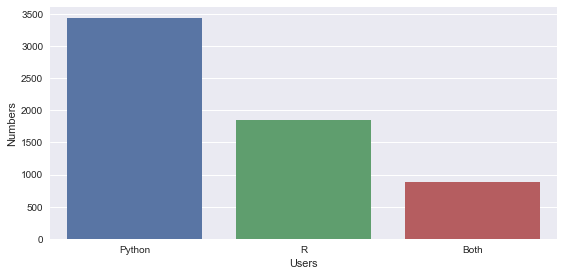

In [98]:
sns.factorplot(y='Numbers',x= 'Users',data=users_df, kind='bar',aspect=2, legend=True)

***Frequency of Python as a tool is almost twice as compared to R***

### ML methods / algorithms and skills for R and Python

In [99]:
df_PVR['WorkMethodsSelect']=df_PVR['WorkMethodsSelect'].fillna('None')
techniques = ['Bayesian Techniques','Data Visualization', 'Logistic Regression','Natural Language Processing',
 'kNN and Other Clustering','Neural Networks','PCA and Dimensionality Reduction',
 'Time Series Analysis', 'Text Analytics','Cross-Validation']

df_PVR['WorkAlgorithmsSelect']=df_PVR['WorkAlgorithmsSelect'].fillna('None')
algorithms = ['Bayesian Techniques','Decision Trees','Random Forests','Regression/Logistic Regression',
 'CNNs', 'RNNs', 'Gradient Boosted Machines','SVMs','GANs','Ensemble Methods']


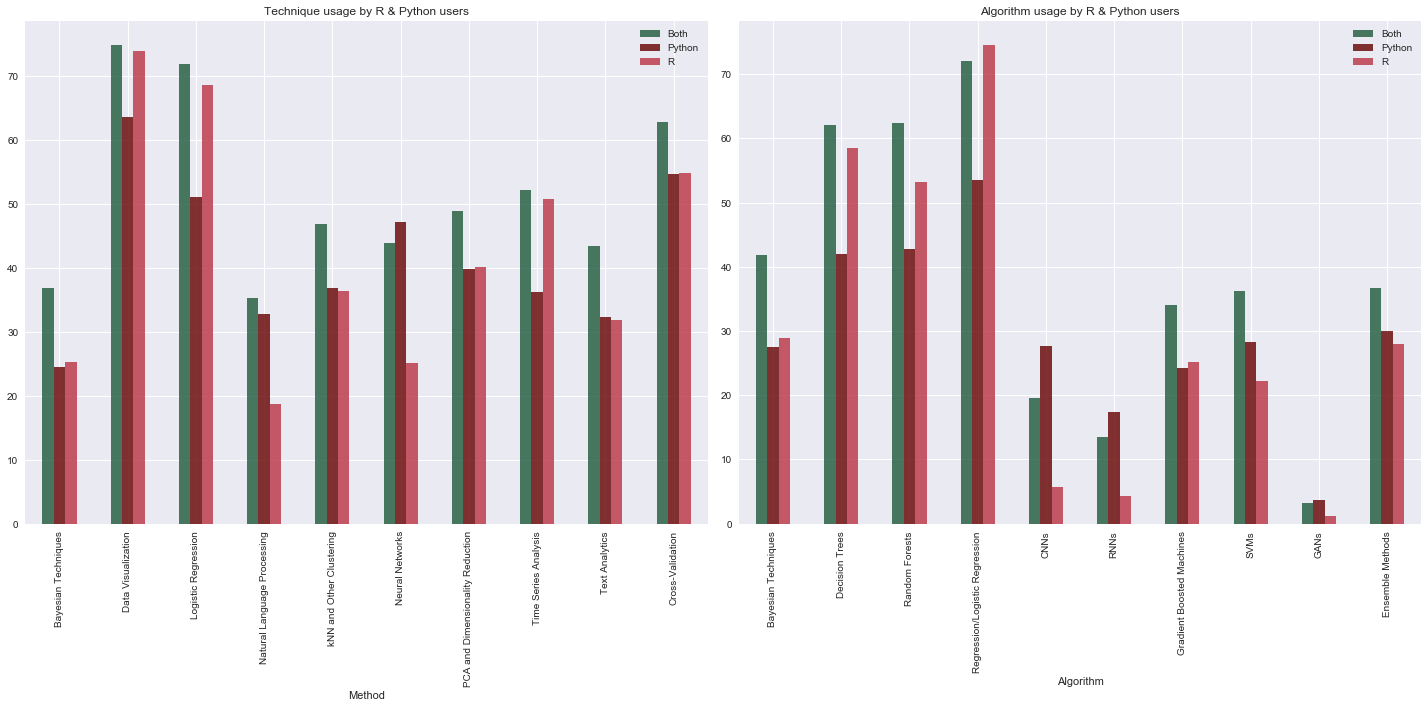

In [100]:
d_t={}
for t in techniques :
    d_t[t]={'Python':0,'R':0,'Both':0}
    for (i,elem) in zip(range(df_PVR.shape[0]),df_PVR['WorkMethodsSelect']):
        if t in elem : 
            d_t[t][df_PVR['PythonVsR'].iloc[i]]+=1
    d_t[t]['Python']=100*d_t[t]['Python']/len(df_PVR[df_PVR['PythonVsR']=='Python'])
    d_t[t]['R']=100*d_t[t]['R']/len(df_PVR[df_PVR['PythonVsR']=='R'])
    d_t[t]['Both']=100*d_t[t]['Both']/len(df_PVR[df_PVR['PythonVsR']=='Both'])
    
d_a={}
for a in algorithms :
    d_a[a]={'Python':0,'R':0,'Both':0}
    for (i,elem) in zip(range(df_PVR.shape[0]),df_PVR['WorkAlgorithmsSelect']):
        if a in elem : 
            d_a[a][df_PVR['PythonVsR'].iloc[i]]+=1
    d_a[a]['Python']=100*d_a[a]['Python']/len(df_PVR[df_PVR['PythonVsR']=='Python'])
    d_a[a]['R']=100*d_a[a]['R']/len(df_PVR[df_PVR['PythonVsR']=='R'])
    d_a[a]['Both']=100*d_a[a]['Both']/len(df_PVR[df_PVR['PythonVsR']=='Both'])
            
f,ax=plt.subplots(1,2,figsize=(20,10))

(pd.DataFrame(d_t)).transpose().plot(kind='bar',ax=ax[0],color = ['#1D5939','#660000','#BB3242'],alpha = .8)
ax[0].set_title("Technique usage by R & Python users")
ax[0].set_ylabel('')
ax[0].set_xlabel("Method")

(pd.DataFrame(d_a)).transpose().plot(kind='bar',ax=ax[1],color = ['#1D5939','#660000','#BB3242'],alpha = .8)
ax[1].set_title("Algorithm usage by R & Python users")
ax[1].set_ylabel('')
ax[1].set_xlabel("Algorithm")

plt.tight_layout()
plt.show();

### Overall Language Recommendation count by Language Users

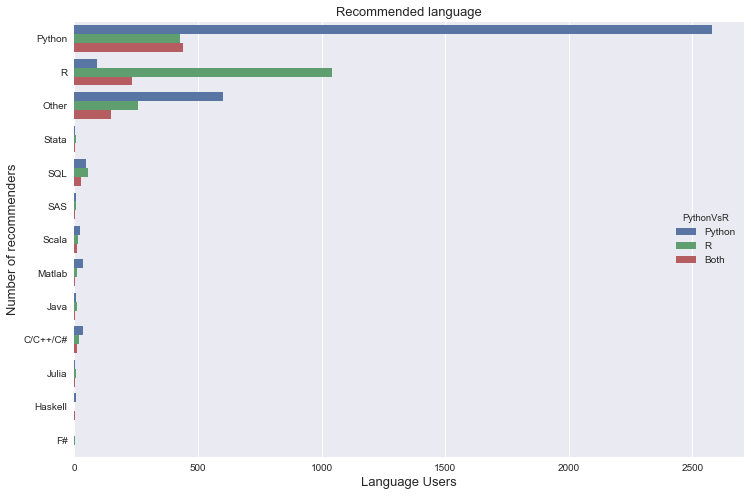

In [101]:
plt.figure(figsize=(12,8))
sns.countplot(y='LanguageRecommendationSelect',hue='PythonVsR',data=df_PVR)
plt.xlabel("Language Users", fontsize=13)
plt.ylabel("Number of recommenders", fontsize=13)
plt.title("Recommended language", fontsize=13)
plt.show();


As shown in the graph above, we noticed that the most recommended languages are Python and R.We will further dive in to find more insights

### Language Recommendation % 

In [102]:
mask_R=(df_PVR['LanguageRecommendationSelect'] == 'R')& (df_PVR['PythonVsR']=='Python')
print('Proportion of Python users who recommend R as the first language to learn: {:0.2f}%'\
      .format(100*len(df_PVR[mask_R])/len(df_PVR[df_PVR['PythonVsR']=='Python'])))
m_R= 100*len(df_PVR[mask_R])/len(df_PVR[df_PVR['PythonVsR']=='Python'])

mask_P=(df_PVR['LanguageRecommendationSelect'] == 'Python')& (df_PVR['PythonVsR']=='R')
print('Proportion of R users who recommend Python as the first language to learn: {:0.2f}%'\
      .format(100*len(df_PVR[mask_P])/len(df_PVR[df_PVR['PythonVsR']=='R'])))
m_p=100*len(df_PVR[mask_P])/len(df_PVR[df_PVR['PythonVsR']=='R'])


Proportion of Python users who recommend R as the first language to learn: 2.68%
Proportion of R users who recommend Python as the first language to learn: 23.12%


Now,Lets plot the graph of Language Recommendation to new DS by Python and R Users

In [103]:
d={'Language':['Python users who recommend R','R users who recommend Python'],'Recommendation(%)':[m_R,m_p]}
df_graph_pr = pd.DataFrame(data=d)

In [104]:
df_graph_pr

,Language,Recommendation(%)
0,Python users who recommend R,2.675974
1,R users who recommend Python,23.122636


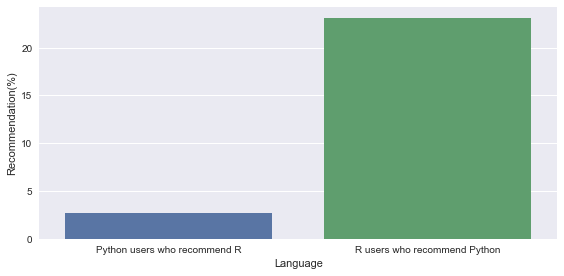

In [105]:
sns.factorplot(y='Recommendation(%)',x= 'Language',data=df_graph_pr, kind='bar',aspect=2)

### Observation: We found that R users recommends Python language to new DS rather than R

# 4.2 Analysis 2 - Where are Data Scientists valued the most?

#### We want to know that which country value the Data Scientist the most in terms of Salary

In [106]:
df_ds=data[['GenderSelect','Country','EmploymentStatus','CurrentJobTitleSelect','CompensationAmount','CompensationCurrency']]

#### We are only keeping fulltime, part time and freelancer respondents as we are focusing on salary distribution

In [107]:
 df_ds=df_ds[(df_ds.EmploymentStatus== 'Employed full-time') | \
        (df_ds.EmploymentStatus == 'Independent contractor, freelancer, or self-employed') | \
        (df_ds.EmploymentStatus == 'Employed part-time')]


#### Considering only Data scientists

In [108]:
df_ds=df_ds[df_ds.CurrentJobTitleSelect == 'Data Scientist']

In [109]:
df_ds.drop('CurrentJobTitleSelect',axis=1, inplace=True)

#### Cleaning CompensationAmount Column

In [110]:
df_ds['CompensationAmount'] = df_ds['CompensationAmount'].fillna(0)
df_ds['CompensationAmount'] = df_ds.CompensationAmount.apply(lambda x: 0 if (pd.isnull(x) or (x=='-') or (x==0))
                                                       else float(x.replace(',','')))


Problem with taking Salary from different country is that the figures are exclusive of the GDP rate of a country.
Consider 1 USD i.e. equivalent to 64.92 Indian Rupee. You can do with 1USD in India more than what you would do with 1USD in the US.

As every country has different cost of living, we are using Purchasing Power Parity(PPP) concept to convert currencies without using market exchange rates. The purchasing power of a currency refers to the quantity of the currency needed to purchase a given unit of a good, or common basket of goods and services.

***In our analysis we have included PPP while calculating the salary.***

**We have taken the purchasing power parity rate from here **:http://www.imf.org/external/datamapper/PPPEX@WEO/OEMDC/ADVEC/WEOWORLD/IND

In [111]:
ppp={'Countries':['United States','India','United Kingdom','Germany','France','Brazil','Canada','Spain','Australia','Russia','Italy',"People 's Republic of China",'Netherlands'],
           'Currency':['USD','INR','GBP','EUR','EUR','BRL','CAD','EUR','AUD','RUB','EUR','CNY','EUR'],
           'PPP':[1.00,17.7,0.7,0.78,0.81,2.05,1.21,0.66,1.46,25.13,0.74,3.51,0.8]}

ppp = pd.DataFrame(data=ppp)

Now, we have ppp table and we will merge it with our conversion rates columns to map the ppp rates with corresponding country

In [155]:
rates=ppp.merge(cvRates,left_on='Currency',right_on='originCountry',how='left')
rates['PPP/ER']=rates['PPP']*rates['exchangeRate']

In [156]:
rates=rates[['Countries','PPP','PPP/ER']]
rates

,Countries,PPP,PPP/ER
0,United States,1.00,1.000000
1,India,17.70,0.276474
2,United Kingdom,0.70,0.926932
3,Germany,0.78,0.932744
4,France,0.81,0.968619
5,Brazil,2.05,0.658767
6,Canada,1.21,0.996662
7,Spain,0.66,0.789245
8,Australia,1.46,1.171373
9,Russia,25.13,0.437312


Here, we are mapping the conversion rates with our original data frame

In [157]:
df_new=df_ds.merge(cvRates,left_on='CompensationCurrency',right_on='originCountry',how='left')

Now, the conversion rates is mapped with the rates df where we have the ppp rates per country

In [158]:
df1=df_new.merge(rates,left_on='Country',right_on='Countries',how='left')
df1.head()

,GenderSelect,Country,EmploymentStatus,CompensationAmount,CompensationCurrency,originCountry,exchangeRate,Countries,PPP,PPP/ER
0,Male,Brazil,Employed full-time,0.0,NaN,NaN,NaN,Brazil,2.05,0.658767
1,Male,India,Employed full-time,95000.0,INR,INR,0.015620,India,17.70,0.276474
2,Male,Colombia,Employed full-time,156000000.0,COP,COP,0.000342,NaN,NaN,NaN
3,Male,Germany,"Independent contractor, freelancer, or self-em...",150000.0,EUR,EUR,1.195826,Germany,0.78,0.932744
4,Male,United Kingdom,Employed full-time,130000.0,GBP,GBP,1.324188,United Kingdom,0.70,0.926932


We have all the required columns now after merging different tables and below is the salary calculation considering exchange rate and purchaisng power parity concept

In [159]:
df1['AdjustedSalary']=df1['CompensationAmount']*df1['exchangeRate']/df1['PPP/ER']
df1.head()

,GenderSelect,Country,EmploymentStatus,CompensationAmount,CompensationCurrency,originCountry,exchangeRate,Countries,PPP,PPP/ER,AdjustedSalary
0,Male,Brazil,Employed full-time,0.0,NaN,NaN,NaN,Brazil,2.05,0.658767,NaN
1,Male,India,Employed full-time,95000.0,INR,INR,0.015620,India,17.70,0.276474,5367.231638
2,Male,Colombia,Employed full-time,156000000.0,COP,COP,0.000342,NaN,NaN,NaN,NaN
3,Male,Germany,"Independent contractor, freelancer, or self-em...",150000.0,EUR,EUR,1.195826,Germany,0.78,0.932744,192307.692308
4,Male,United Kingdom,Employed full-time,130000.0,GBP,GBP,1.324188,United Kingdom,0.70,0.926932,185714.285714


In [160]:
salary = {}
for country in df1['Country'].value_counts().index :
    salary[country]=df1[df1['Country']==country]['AdjustedSalary'].median()
    
median_wages = pd.DataFrame.from_dict(data=salary, orient='index').round(2)
median_wages.sort_values(by=list(median_wages),axis=0, ascending=True, inplace=True)


In [161]:
median_wages.dropna(inplace=True)

In [162]:
median_wages

,0
Russia,24830.88
India,56497.18
France,58024.69
Brazil,58536.59
Spain,60606.06
Italy,66216.22
People 's Republic of China,68376.07
United Kingdom,71428.57
Netherlands,76250.00
Germany,76923.08


**Inflation rate has been taken from https://tradingeconomics.com/country-list/inflation-rate**

In [163]:
inflations={'Countries':['United States','India','United Kingdom','Germany','France','Brazil','Canada','Spain','Australia','Russia','Italy',"People 's Republic of China",'Netherlands'],
           'infrate_2013':[106.83,131.98,110.15,105.68,105.01,119.37,105.45,107.21,107.70,121.64,107.20,111.16,107.48],
           'infrate_2017':[113.10,162.01,116.51,109.6,107.1,156.73,112.39,109.13,113.48,168.50,108.61,119.75,111.55],
           'medrate':[15480,615,12399,14098,12445,2247,15181,7284,15026,4129,6874,1786,14450]}

inflations_rates = pd.DataFrame(inflations)
inflations_rates['adjusted_medians']=(inflations_rates['medrate']*inflations_rates['infrate_2017']/inflations_rates['infrate_2013']).round(2)
inflations_rates

,Countries,infrate_2013,infrate_2017,medrate,adjusted_medians
0,United States,106.83,113.10,15480,16388.54
1,India,131.98,162.01,615,754.93
2,United Kingdom,110.15,116.51,12399,13114.91
3,Germany,105.68,109.60,14098,14620.94
4,France,105.01,107.10,12445,12692.69
5,Brazil,119.37,156.73,2247,2950.26
6,Canada,105.45,112.39,15181,16180.11
7,Spain,107.21,109.13,7284,7414.45
8,Australia,107.70,113.48,15026,15832.41
9,Russia,121.64,168.50,4129,5719.64


In [164]:
tmp=median_wages.reset_index()
tmp = tmp.rename(columns={'index': 'Country', 0: 'median_income'})

inflations_rates=inflations_rates.merge(tmp,left_on='Countries',right_on='Country',how='left')
inflations_rates['ratio_incomes']=(inflations_rates['median_income']/inflations_rates['adjusted_medians']).round(2)

tmp2=inflations_rates[['Country','ratio_incomes']]
tmp2.sort_values(by='ratio_incomes',axis=0, ascending=True, inplace=True)

##  Salary Distribution Before GDP Calculation

In [165]:

data = [ dict(
        type = 'choropleth',
       locations =tmp['Country'],
        locationmode = 'country names',
        z = tmp['median_income'],
        text = tmp['Country'],
        colorscale = [[0,"rgb(5, 10, 172)"],[0.35,"rgb(40, 60, 190)"],[0.5,"rgb(70, 100, 245)"],
            [0.6,"rgb(90, 120, 245)"],[0.7,"rgb(106, 137, 247)"],[1,"rgb(220, 220, 220)"]],
        autocolorscale = False,
        reversescale = True,
        marker = dict(
            line = dict (
                color = 'rgb(180,180,180)',
                width = 0.5
            ) ),
        colorbar = dict(
            autotick = False,
            title = 'Salary in USD'),
      ) ]

layout = dict(
    title = 'Salary Distribution by countries (USD)',
    geo = dict(
        showframe = False,
        showcoastlines = True,
        projection = dict(
            type = 'Mercator'
        )
    )
)

fig = dict( data=data, layout=layout )
py.iplot( fig, validate=False, filename='world-map')

## Salary Distribution After GDP Calculation

In [173]:
median_wages.dropna(inplace=True)
data = [ dict(
        type = 'choropleth',
       locations = tmp2['Country'],
        locationmode = 'country names',
        z = tmp2['ratio_incomes'],
        text = tmp2['Country'],
        colorscale = [[0,"rgb(5, 10, 172)"],[0.35,"rgb(40, 60, 190)"],[0.5,"rgb(70, 100, 245)"],
            [0.6,"rgb(90, 120, 245)"],[0.7,"rgb(106, 137, 247)"],[1,"rgb(220, 220, 220)"]],
        autocolorscale = False,
        reversescale = True,
        marker = dict(
            line = dict (
                color = 'rgb(180,180,180)',
                width = 0.5
            ) ),
        colorbar = dict(
            autotick = False,
            title = 'Salary'),
      ) ]

layout = dict(
    title = 'Most Valued Data Scientist Countries',
    geo = dict(
        showframe = False,
        showcoastlines = True,
        projection = dict(
            type = 'Mercator'
        )
    )
)

fig = dict( data=data, layout=layout )
py.iplot( fig, validate=False, filename='world-map')

#### Observation: We observed that salary distribution is totally different when we consider the GDP/PPP concept and this completely change the way when we analyze the countries where the data scientists are valued the most. 

#### In the first graph, we found that United States is valuing the Data Scientists the most followed by United Kingdom whereas in the second graph when we consider PPP concept, India is the one who is valuing the Data Scientists the most followed by China


# 4.3 Analysis 3 - What you should have to get paid the most 

We are analyzing what one should have to get paid the most and we are predicting this for Data Scientist and Data Analyst only using Random Forest Classifier

In [38]:
data = pd.read_csv('multiple Choice Responses.csv', encoding="ISO-8859-1")

In [39]:
df_skills = data[['EmploymentStatus','CodeWriter','CurrentJobTitleSelect','PublicDatasetsSelect',
'LearningPlatformUsefulnessCollege',
'LearningPlatformUsefulnessCompany',
'LearningPlatformUsefulnessNewsletters',
'LearningPlatformUsefulnessCommunities',
'LearningPlatformUsefulnessDocumentation',
'LearningPlatformUsefulnessCourses',
'LearningPlatformUsefulnessProjects',
'LearningPlatformUsefulnessSO',
'LearningPlatformUsefulnessTextbook',
'LearningPlatformUsefulnessTradeBook',
'LearningPlatformUsefulnessTutoring',
'LearningPlatformUsefulnessYouTube',
'JobSkillImportanceBigData',
'JobSkillImportanceDegree',
'JobSkillImportanceStats',
'JobSkillImportanceEnterpriseTools',
'JobSkillImportancePython',
'JobSkillImportanceR',
'JobSkillImportanceSQL',
'JobSkillImportanceKaggleRanking',
'JobSkillImportanceMOOC',
'JobSkillImportanceVisualizations',
'FormalEducation',
'MajorSelect',
'Tenure',
'LearningCategorySelftTaught',
'LearningCategoryOnlineCourses',
'LearningCategoryWork',
'LearningCategoryUniversity',
'LearningCategoryKaggle',
'LearningCategoryOther',
'MLTechniquesSelect','CompensationAmount','CompensationCurrency',
'WorkToolsFrequencyAmazonML',
'WorkToolsFrequencyAngoss',
'WorkToolsFrequencyC',
'WorkToolsFrequencyCloudera',
'WorkToolsFrequencyDataRobot',
'WorkToolsFrequencyFlume',
'WorkToolsFrequencyGCP',
'WorkToolsFrequencyHadoop',
'WorkToolsFrequencyIBMCognos',
'WorkToolsFrequencyIBMSPSSModeler',
'WorkToolsFrequencyIBMSPSSStatistics',
'WorkToolsFrequencyIBMWatson',
'WorkToolsFrequencyImpala',
'WorkToolsFrequencyJava',
'WorkToolsFrequencyJulia',
'WorkToolsFrequencyKNIMECommercial',
'WorkToolsFrequencyKNIMEFree',
'WorkToolsFrequencyMathematica',
'WorkToolsFrequencyMATLAB',
'WorkToolsFrequencyAzure',
'WorkToolsFrequencyExcel',
'WorkToolsFrequencyMicrosoftRServer',
'WorkToolsFrequencyMinitab',
'WorkToolsFrequencyNoSQL',
'WorkToolsFrequencyOracle',
'WorkToolsFrequencyOrange',
'WorkToolsFrequencyPerl',
'WorkToolsFrequencyQlik',
'WorkToolsFrequencyRapidMinerCommercial',
'WorkToolsFrequencyRapidMinerFree',
'WorkToolsFrequencySalfrod',
'WorkToolsFrequencySAPBusinessObjects',
'WorkToolsFrequencySASBase',
'WorkToolsFrequencySASEnterprise',
'WorkToolsFrequencySASJMP',
'WorkToolsFrequencySpark',
'WorkToolsFrequencyStan',
'WorkToolsFrequencyStatistica',
'WorkToolsFrequencyTensorFlow',
'WorkToolsFrequencyTIBCO',
'WorkToolsFrequencyUnix'\
]]

In [40]:
df_skills['CompensationAmount'] = df_skills.CompensationAmount.apply(lambda x: 0 if (pd.isnull(x) or (x=='-') or (x==0))
                                                       else float(x.replace(',','')))

In [41]:
df_skills=df_skills[df_skills.CompensationAmount.notnull()]

In [42]:
df_skills=df_skills[df_skills.CompensationCurrency.notnull()]

In [43]:
df=df_skills.merge(cvRates,left_on='CompensationCurrency',right_on='originCountry',how='left')

In [44]:
df['CompensationAmountUSD'] = df.CompensationAmount*df.exchangeRate

In [45]:
df = df[df["CompensationAmountUSD"].notnull()]

In [46]:
df.drop(['originCountry','CompensationAmount','CompensationCurrency','exchangeRate'], axis=1, inplace=True)

In [47]:
df1=df[df.CurrentJobTitleSelect == 'Data Scientist']

In [48]:
y = df1["CompensationAmountUSD"]
X = df1.drop("CompensationAmountUSD", 1)

In [49]:
X = X.fillna(0)
X_dummied = pd.get_dummies(X)
y_binary = y > 50000

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X_dummied, y_binary, random_state=0)
clf = RandomForestClassifier(n_estimators=20, random_state=0).fit(X_train, y_train)

print("score:{}".format(clf.score(X_test, y_test)))

score:0.6257668711656442


In [51]:
outds = pd.DataFrame()
outds["data_scientist_feature_name"] = X_dummied.columns.tolist()
outds["feature_importance"] = clf.feature_importances_
outds.sort_values("feature_importance",ascending=False).to_csv("results.csv", index=False)

In [52]:
top_10=outds.sort_values("feature_importance",ascending=False).head(10)

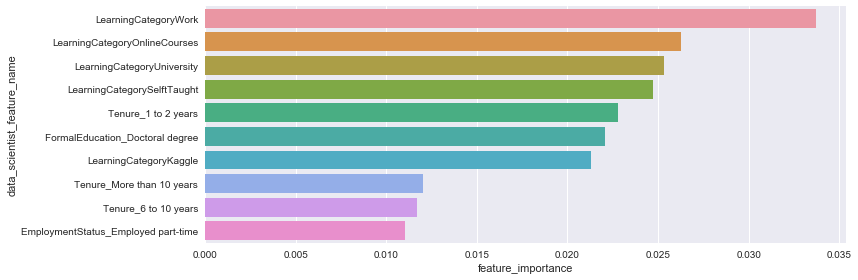

In [53]:
sns.factorplot(x='feature_importance', y='data_scientist_feature_name', data=top_10, kind='bar', aspect=3)

In [54]:
df2=df[df.CurrentJobTitleSelect == 'Data Analyst']

In [55]:
#df = df.drop('CompensationAmount', 1)
y1 = df2["CompensationAmountUSD"]
X1 = df2.drop("CompensationAmountUSD", 1)


In [56]:
X1 = X1.fillna(0)
X_dummied1 = pd.get_dummies(X1)
y_binary1 = y1 > 50000

In [57]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_dummied1, y_binary1, random_state=0)
clf = RandomForestClassifier(n_estimators=20, random_state=0).fit(X_train1, y_train1)

print("score:{}".format(clf.score(X_test1, y_test1)))

score:0.64


In [58]:
outda = pd.DataFrame()
outda["data_analyst_feature_name"] = X_dummied1.columns.tolist()
outda["feature_importance"] = clf.feature_importances_
outda.sort_values("feature_importance",ascending=False).to_csv("results.csv", index=False)

In [59]:
top_10=outda.sort_values("feature_importance",ascending=False).head(10)

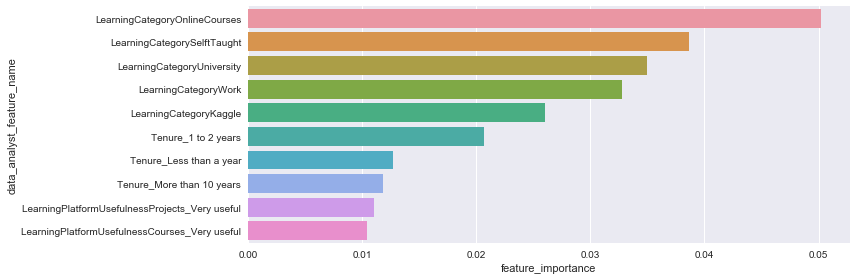

In [60]:
sns.factorplot(x='feature_importance', y='data_analyst_feature_name', data=top_10, kind='bar', aspect=3)

In [61]:
top10_da = outda.sort_values("feature_importance",ascending=False).head(10)
top10_ds = outds.sort_values("feature_importance",ascending=False).head(10)

In [62]:
top10_dao=top10_da.data_analyst_feature_name
top10_da_fea=top10_dao.values[:10]

In [63]:
top10_dso=top10_ds.data_scientist_feature_name
top10_ds_fea=top10_dso.values[:10]

Text(-20,40,'EmploymentStatus_Employed part-time,\nTenure_6 to 10 years,\nFormalEducation_Doctoral degree')

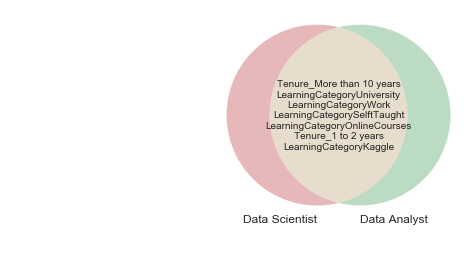

In [64]:
from matplotlib_venn import venn2
A =set(top10_da_fea)
B =set(top10_ds_fea)
# First way to call the 2 group Venn diagram:
v=venn2([A,B],('Data Scientist', 'Data Analyst'))


v.get_label_by_id('10').set_text('')
v.get_label_by_id('11').set_text('\n'.join(A&B))
v.get_label_by_id('01').set_text('')
#v.get_label_by_id('001').set_text('\n'.join(C-A-B))
v.get_label_by_id('01').set_text('')
plt.annotate(',\n'.join(B-A), xy=v.get_label_by_id('01').get_position() +
             np.array([0, 0.8]), xytext=(-20,40), ha='center',
             textcoords='offset points',
             bbox=dict(boxstyle='round,pad=20', fc='black', alpha=1),
             arrowprops=dict(arrowstyle='->',              
                             connectionstyle='arc',color='gray'))


plt.show()


